<a href="https://colab.research.google.com/github/capain1/Refugecode/blob/main/refugecode_prevalence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
r = 2  # growth rate
c = 1  # normal death
beta = 0.02  # infection rate
gamma = 1  # extra death from infection
b = 0.3  # phage death
n = 5  # burst size (disease growth)
k = 1000  # carrying capacity of susceptible population
muout = 0  # rate at which sus leave refuge
muin = 0  # rate at which sus move to refuge
alpha = 0.3  # death rate in refuge
m = 1000  # carrying capacity of refuge population

# Initial conditions
N0 = (np.log(10), np.log(10), np.log(10), np.log(1))

# Model def
def model(t, N, r, c, beta, gamma, b, n, k, muin, muout, alpha, m):
    S = N[0]
    I = N[1]
    P = N[2]
    R = N[3]

    dS = r * (1 - np.exp(S) / k)*(np.exp(S) + f * np.exp(I))- c * np.exp(S) - beta * np.exp(P) - muin + muout * np.exp(R - S)
    dI = beta * np.exp(S + P - I) - c - gamma
    dP = gamma * n * np.exp(I - P) - b
    dR = r * (1 - np.exp(R) / m) + muin * np.exp(S - R) - alpha - muout

    return np.array([dS, dI, dP, dR])

# Time points to use
tc = np.linspace(100, 1100, 5001)

# Create a meshgrid of muin and muout values
muin_range = np.arange(0, 10.1, 0.1)
muout_range = np.arange(0, 10.1, 0.1)
muin_mesh, muout_mesh = np.meshgrid(muin_range, muout_range)

# Create arrays to store average susceptible density and prevalence
avg_sus = np.zeros_like(muin_mesh)
avg_prev = np.zeros_like(muin_mesh)

# Loop over muin and muout values
for i, muin_val in enumerate(muin_range):
    for j, muout_val in enumerate(muout_range):
        print(f'Testing combination: muin={muin_val:.2f}, muout={muout_val:.2f}')

        # Solve
        sol = solve_ivp(model, [tc[0], tc[-1]], N0, t_eval=tc,
                        args=(r, c, beta, gamma, b, n, k, muin_val, muout_val, alpha, m))

        S = sol.y[0]
        I = sol.y[1]

        # avgerage no of sus in population and the prevalence of the disease
        avg_sus[i, j] = np.mean(np.exp(S))
        avg_prev[i, j] = np.mean(np.exp(I) / (np.exp(S) + np.exp(I)))


Testing combination: muin=0.00, muout=0.00


<ipython-input-1-b2084ae62a0a>:30: RuntimeWarning: overflow encountered in exp
  dP = gamma * n * np.exp(I - P) - b
<ipython-input-1-b2084ae62a0a>:29: RuntimeWarning: overflow encountered in exp
  dI = beta * np.exp(S + P - I) - c - gamma
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)


Testing combination: muin=0.00, muout=0.10
Testing combination: muin=0.00, muout=0.20
Testing combination: muin=0.00, muout=0.30
Testing combination: muin=0.00, muout=0.40
Testing combination: muin=0.00, muout=0.50
Testing combination: muin=0.00, muout=0.60
Testing combination: muin=0.00, muout=0.70
Testing combination: muin=0.00, muout=0.80
Testing combination: muin=0.00, muout=0.90
Testing combination: muin=0.00, muout=1.00
Testing combination: muin=0.00, muout=1.10
Testing combination: muin=0.00, muout=1.20
Testing combination: muin=0.00, muout=1.30
Testing combination: muin=0.00, muout=1.40
Testing combination: muin=0.00, muout=1.50
Testing combination: muin=0.00, muout=1.60
Testing combination: muin=0.00, muout=1.70
Testing combination: muin=0.00, muout=1.80
Testing combination: muin=0.00, muout=1.90
Testing combination: muin=0.00, muout=2.00
Testing combination: muin=0.00, muout=2.10
Testing combination: muin=0.00, muout=2.20
Testing combination: muin=0.00, muout=2.30
Testing com

<ipython-input-1-b2084ae62a0a>:31: RuntimeWarning: overflow encountered in exp
  dR = r * (1 - np.exp(R) / m) + muin * np.exp(S - R) - alpha - muout
<ipython-input-1-b2084ae62a0a>:31: RuntimeWarning: invalid value encountered in scalar multiply
  dR = r * (1 - np.exp(R) / m) + muin * np.exp(S - R) - alpha - muout


Testing combination: muin=0.00, muout=2.60
Testing combination: muin=0.00, muout=2.70
Testing combination: muin=0.00, muout=2.80
Testing combination: muin=0.00, muout=2.90
Testing combination: muin=0.00, muout=3.00
Testing combination: muin=0.00, muout=3.10
Testing combination: muin=0.00, muout=3.20
Testing combination: muin=0.00, muout=3.30
Testing combination: muin=0.00, muout=3.40
Testing combination: muin=0.00, muout=3.50
Testing combination: muin=0.00, muout=3.60
Testing combination: muin=0.00, muout=3.70
Testing combination: muin=0.00, muout=3.80
Testing combination: muin=0.00, muout=3.90
Testing combination: muin=0.00, muout=4.00
Testing combination: muin=0.00, muout=4.10
Testing combination: muin=0.00, muout=4.20
Testing combination: muin=0.00, muout=4.30
Testing combination: muin=0.00, muout=4.40
Testing combination: muin=0.00, muout=4.50
Testing combination: muin=0.00, muout=4.60
Testing combination: muin=0.00, muout=4.70
Testing combination: muin=0.00, muout=4.80
Testing com

<ipython-input-1-b2084ae62a0a>:28: RuntimeWarning: overflow encountered in exp
  dS = r * (1 - np.exp(S) / k) - c * np.exp(S) - beta * np.exp(P) - muin + muout * np.exp(R - S)
<ipython-input-1-b2084ae62a0a>:28: RuntimeWarning: invalid value encountered in scalar multiply
  dS = r * (1 - np.exp(S) / k) - c * np.exp(S) - beta * np.exp(P) - muin + muout * np.exp(R - S)


Streaming output truncated to the last 5000 lines.
Testing combination: muin=5.10, muout=5.00
Testing combination: muin=5.10, muout=5.10
Testing combination: muin=5.10, muout=5.20
Testing combination: muin=5.10, muout=5.30
Testing combination: muin=5.10, muout=5.40
Testing combination: muin=5.10, muout=5.50
Testing combination: muin=5.10, muout=5.60
Testing combination: muin=5.10, muout=5.70
Testing combination: muin=5.10, muout=5.80
Testing combination: muin=5.10, muout=5.90
Testing combination: muin=5.10, muout=6.00
Testing combination: muin=5.10, muout=6.10
Testing combination: muin=5.10, muout=6.20
Testing combination: muin=5.10, muout=6.30
Testing combination: muin=5.10, muout=6.40
Testing combination: muin=5.10, muout=6.50
Testing combination: muin=5.10, muout=6.60
Testing combination: muin=5.10, muout=6.70
Testing combination: muin=5.10, muout=6.80
Testing combination: muin=5.10, muout=6.90
Testing combination: muin=5.10, muout=7.00
Testing combination: muin=5.10, muout=7.10
Tes

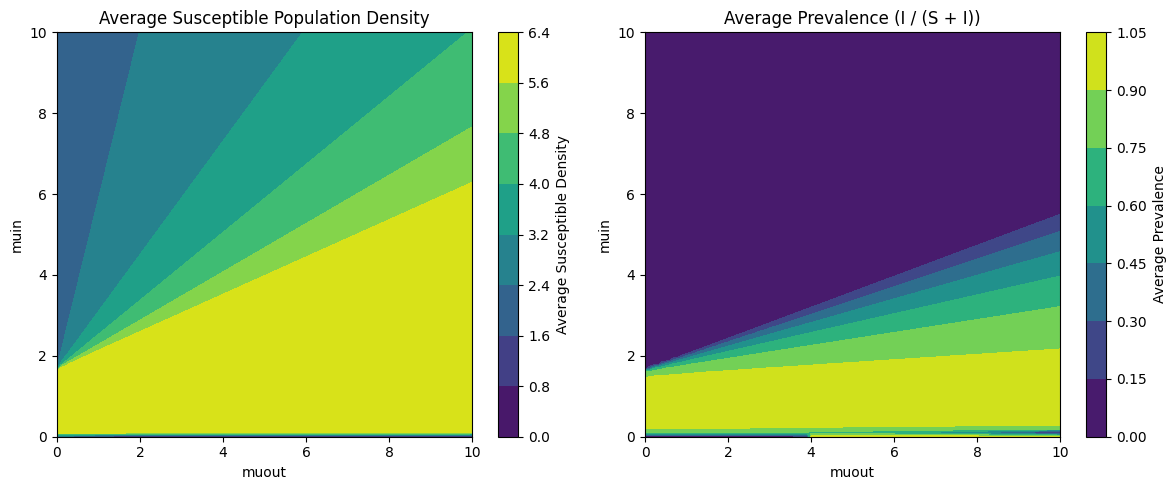

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(muout_mesh, muin_mesh, avg_sus, cmap='viridis')
plt.colorbar(label='Average Susceptible Density')
plt.xlabel('muout')
plt.ylabel('muin')
plt.title('Average Susceptible Population Density')

plt.subplot(1, 2, 2)
plt.contourf(muout_mesh, muin_mesh, avg_prev, cmap='viridis')
plt.colorbar(label='Average Prevalence')
plt.xlabel('muout')
plt.ylabel('muin')
plt.title('Average Prevalence (I / (S + I))')

plt.tight_layout()
plt.show()